In [5]:
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:
# loading CIFAR10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# normalizing data
train_images = train_images.reshape((50000, 32, 32, 3)) / 255.0
test_images = test_images.reshape((10000, 32, 32, 3)) / 255.0

In [7]:
# m is the number of training examples
m = train_images.shape[0]
shuffled_indices = np.random.permutation(m)
# shuffling the training data randomely
train_images_shuffled = train_images[shuffled_indices]
train_labels_shuffled = train_labels[shuffled_indices]

# setting 0.20 of the training data to validation set randomly
validation_set_size = int(0.2 * 50000)

validation_set = train_images_shuffled[0:validation_set_size]
validation_set_labels = train_labels_shuffled[0:validation_set_size]

training_set = train_images_shuffled[validation_set_size:]
training_set_labels = train_labels_shuffled[validation_set_size:]

In [8]:
# one hot encoding of the labels
train_labels_shuffled = to_categorical(train_labels_shuffled, num_classes=10)
training_set_labels = to_categorical(training_set_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)
validation_set_labels = to_categorical(validation_set_labels, num_classes=10)

In [9]:
# training function
def history(model, training_data, training_data_labels, validation_data, validation_data_labels, epochs, batch_size):
    history = model.fit(training_data, training_data_labels,
                          epochs=epochs, batch_size=batch_size,
                          validation_data=(validation_data, validation_data_labels))
    return history

In [10]:
# plotting loss and accuracy corresponding to the validation set
def plot_validation(history, epochs):
    history_dict = history.history
    loss_values = history_dict['loss']
    test_loss_values = history_dict['val_loss']
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
    plt.plot(epochs_range, test_loss_values, 'ro', label='validation')
    plt.title('Training and test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc_values = history_dict['acc']
    test_acc_values = history_dict['val_acc']
    plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs_range, test_acc_values, 'ro', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    

In [11]:
# plotting loss and accuracy corresponding to the test set
def plot_test(history, epochs):
    history_dict = history.history
    loss_values = history_dict['loss']
    test_loss_values = history_dict['val_loss']
    epochs_range = range(1, epochs + 1)
    plt.plot(epochs_range, loss_values, 'bo', label='non-test loss')
    plt.plot(epochs_range, test_loss_values, 'ro', label='test loss')
    plt.title('non-test and test loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc_values = history_dict['acc']
    test_acc_values = history_dict['val_acc']
    plt.plot(epochs_range, acc_values, 'bo', label='non-test accuracy')
    plt.plot(epochs_range, test_acc_values, 'ro', label='test accuracy')
    plt.title('non-test and test accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    

## Architecture 1

In [ ]:
# Architecture 1
print("--------------------First Architecture--------------------")

model_1 = models.Sequential()
# CNN layers
#1
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
#2
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
#3
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))

#classifier
#Dense layers
model_1.add(layers.Flatten())
model_1. add(layers.Dense(256, activation='relu'))
model_1. add(layers.Dense(10, activation='softmax'))

model_1.summary()


model_1.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# model_1 results
plot_validation(history(model_1,training_set, training_set_labels, validation_set,validation_set_labels,20, 64),20)

## Architecture 2

--------------------Second Architecture with Dropout--------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)               0         
_________________________________________________________________
dro

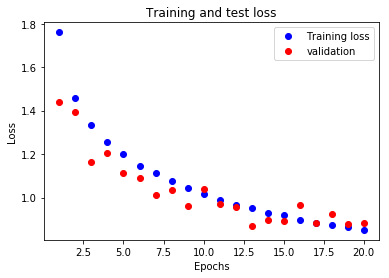

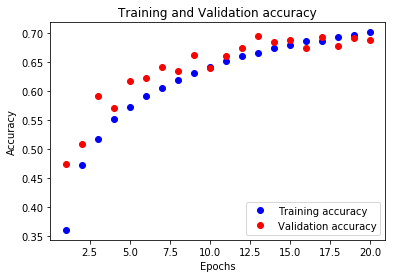

In [16]:
# Architecture 2
print("--------------------Second Architecture with Dropout--------------------")

model_2 = models.Sequential()
# CNN layers
#1
model_2.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
#2
model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
#3
model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))

model_2.add(layers.Flatten())

#Dense layers, classification
# DROPOUT
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()


model_2.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# model_2 results
plot_validation(history(model_2,training_set, training_set_labels, validation_set,validation_set_labels,20, 64),20)


## Architecture 3


--------------------Third Architecture with data augmentation--------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 128)         0         
____________________________________________________________

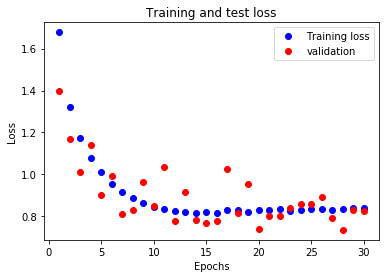

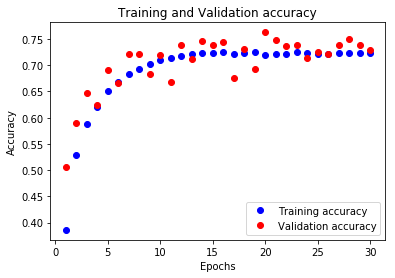

In [17]:
# Architecture 3
print("--------------------Third Architecture with data augmentation--------------------")

model_3 = models.Sequential()
#CNN layers
#1
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
#2
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
#3
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D(2, 2))

model_3.add(layers.Flatten())

#Dense layers, classification
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()


model_3.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

#Data augmentation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally 
    height_shift_range=0.1,  # randomly shift images vertically 
    horizontal_flip=True)  # flip images horizontally

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(training_set, training_set_labels, batch_size=32)
validation_generator = validation_datagen.flow(validation_set, validation_set_labels, batch_size=32)

#training with data augmentation
history_dataaug_model3 = model_3.fit_generator(train_generator, validation_data=validation_generator,
                                validation_steps=len(training_set) / 32, steps_per_epoch=len(training_set) / 32,
                                epochs=30, verbose=2)

#model_3 results
plot_validation(history_dataaug_model3,30)


## Architecture 4


--------------------Fourth Architecture with dropout and strides--------------------
Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 5s 133us/step - loss: 1.6339 - acc: 0.3976 - val_loss: 1.4762 - val_acc: 0.4741
Epoch 2/30
40000/40000 [==============================] - 5s 122us/step - loss: 1.2562 - acc: 0.5473 - val_loss: 1.0837 - val_acc: 0.6156
Epoch 3/30
40000/40000 [==============================] - 5s 132us/step - loss: 1.0512 - acc: 0.6278 - val_loss: 1.1924 - val_acc: 0.5912
Epoch 4/30
40000/40000 [==============================] - 4s 109us/step - loss: 0.9212 - acc: 0.6759 - val_loss: 1.2105 - val_acc: 0.6166
Epoch 5/30
40000/40000 [==============================] - 5s 113us/step - loss: 0.8181 - acc: 0.7143 - val_loss: 1.0562 - val_acc: 0.6585
Epoch 6/30
40000/40000 [==============================] - 4s 112us/step - loss: 0.7421 - acc: 0.7399 - val_loss: 1.1850 - val_acc: 0.6087
Epoch 7/30
40000/40000 [=============

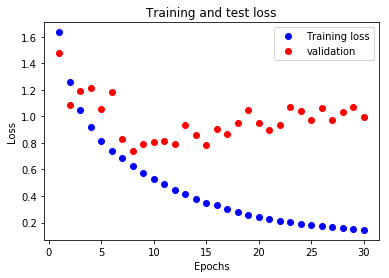

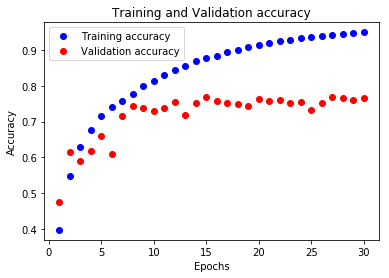

In [19]:
# Architecture 4
print("--------------------Fourth Architecture with dropout and strides--------------------")

model_4 = models.Sequential()
# CNN layers
#1
model_4.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
#2
model_4.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
#3
model_4.add(layers.Conv2D(64, (3, 3), activation = 'relu', strides = 2))
#4
model_4.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
#5
model_4.add(layers.Conv2D(128, (3, 3), activation = 'relu', strides=2))
#6
model_4.add(layers.Conv2D(128, (3, 3), activation = 'relu'))

model_4.add(layers.Flatten())

# Dense layers, classification
#Dropout
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(128, activation = 'relu'))
model_4.add(layers.normalization.BatchNormalization())
model_4.add(layers.Dense(10, activation = 'softmax'))

model_4.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
# model_4 results
plot_validation(history(model_4,training_set, training_set_labels, validation_set,validation_set_labels,30, 64),30)

## Architecture 5


--------------------Fifth Architecture with data augmentation and dropout-------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 256)       295168    
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 256)       590080    
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 5, 5, 512)         1180160   
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 3, 3, 512)         2359808   
_________________________________________________

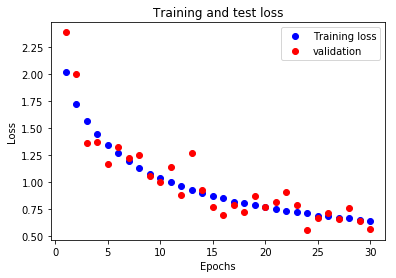

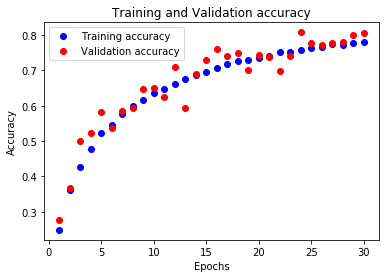

In [17]:
# Architecture 5
print("--------------------Fifth Architecture with data augmentation and dropout-------------------")

model_5 = models.Sequential()
#CNN layers
#1
model_5.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
#2
model_5.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
#3
model_5.add(layers.Conv2D(256, (3, 3), activation = 'relu', strides = 2))
#4
model_5.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
#5
model_5.add(layers.Conv2D(512, (3, 3), activation = 'relu', strides=2))
#6
model_5.add(layers.Conv2D(512, (3, 3), activation = 'relu'))

#Dense layers
model_5.add(layers.Flatten())
#Dropout
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(256, activation = 'relu'))
#batch normalization added
model_5.add(layers.normalization.BatchNormalization())
model_5.add(layers.Dense(10, activation = 'softmax'))

model_5.summary()


model_5.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,  
    height_shift_range=0.2,
    shear_range=0.2,   
    horizontal_flip=True) 

validation_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(training_set, training_set_labels, batch_size=32)
validation_generator = validation_datagen.flow(validation_set, validation_set_labels, batch_size=32)
history_dataaug_model5 = model_5.fit_generator(train_generator, validation_data=validation_generator,
                                validation_steps=len(training_set) / 32, steps_per_epoch=len(training_set) / 32,
                                epochs=30, verbose=2)

#model_5 results
plot_validation(history_dataaug_model5,30)


## Training on the non-test data and testing on the test data with the winner architecture

--------------------Winner : Fifth Architecture with data augmentation and dropout-------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 28, 28, 256)       295168    
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 11, 11, 256)       590080    
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 5, 5, 512)         1180160   
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 3, 3, 512)         2359808   
________________________________________

Epoch 75/200
 - 36s - loss: 0.3819 - acc: 0.8725 - val_loss: 0.5670 - val_acc: 0.8372
Epoch 76/200
 - 36s - loss: 0.3887 - acc: 0.8693 - val_loss: 0.5964 - val_acc: 0.8328
Epoch 77/200
 - 36s - loss: 0.3812 - acc: 0.8707 - val_loss: 0.5174 - val_acc: 0.8521
Epoch 78/200
 - 36s - loss: 0.3780 - acc: 0.8720 - val_loss: 0.4728 - val_acc: 0.8608
Epoch 79/200
 - 36s - loss: 0.3748 - acc: 0.8741 - val_loss: 0.5352 - val_acc: 0.8377
Epoch 80/200
 - 36s - loss: 0.3745 - acc: 0.8746 - val_loss: 0.5175 - val_acc: 0.8377
Epoch 81/200
 - 36s - loss: 0.3673 - acc: 0.8754 - val_loss: 0.4134 - val_acc: 0.8657
Epoch 82/200
 - 36s - loss: 0.3680 - acc: 0.8768 - val_loss: 0.4998 - val_acc: 0.8401
Epoch 83/200
 - 36s - loss: 0.3656 - acc: 0.8761 - val_loss: 0.5740 - val_acc: 0.8214
Epoch 84/200
 - 36s - loss: 0.3698 - acc: 0.8754 - val_loss: 0.4134 - val_acc: 0.8667
Epoch 85/200
 - 36s - loss: 0.3668 - acc: 0.8758 - val_loss: 0.4009 - val_acc: 0.8685
Epoch 86/200
 - 36s - loss: 0.3647 - acc: 0.8772 - val

Epoch 170/200
 - 37s - loss: 0.2640 - acc: 0.9119 - val_loss: 0.4917 - val_acc: 0.8550
Epoch 171/200
 - 37s - loss: 0.2656 - acc: 0.9104 - val_loss: 0.4709 - val_acc: 0.8612
Epoch 172/200
 - 37s - loss: 0.2631 - acc: 0.9127 - val_loss: 0.5202 - val_acc: 0.8575
Epoch 173/200
 - 37s - loss: 0.2630 - acc: 0.9126 - val_loss: 0.4857 - val_acc: 0.8672
Epoch 174/200
 - 37s - loss: 0.2615 - acc: 0.9125 - val_loss: 0.5163 - val_acc: 0.8646
Epoch 175/200
 - 36s - loss: 0.2593 - acc: 0.9133 - val_loss: 0.4256 - val_acc: 0.8756
Epoch 176/200
 - 37s - loss: 0.2611 - acc: 0.9133 - val_loss: 0.4473 - val_acc: 0.8764
Epoch 177/200
 - 36s - loss: 0.2627 - acc: 0.9117 - val_loss: 0.5319 - val_acc: 0.8533
Epoch 178/200
 - 36s - loss: 0.2562 - acc: 0.9133 - val_loss: 0.5171 - val_acc: 0.8624
Epoch 179/200
 - 37s - loss: 0.2605 - acc: 0.9121 - val_loss: 0.4002 - val_acc: 0.8705
Epoch 180/200
 - 37s - loss: 0.2589 - acc: 0.9131 - val_loss: 0.8749 - val_acc: 0.8096
Epoch 181/200
 - 37s - loss: 0.2598 - acc: 

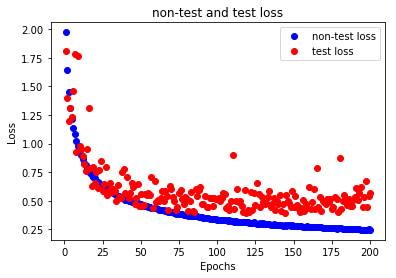

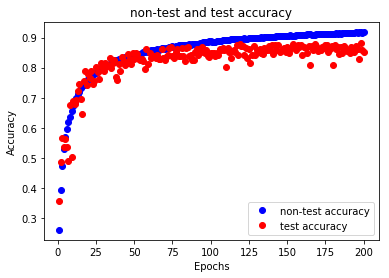

In [20]:
# training the data on both training and validation set with the best architecture above (arch 5), then testing on the test data
print("--------------------Winner : Fifth Architecture with data augmentation and dropout-------------------")

model_winner = models.Sequential()
#CNN layers
#1
model_winner.add(layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
#2
model_winner.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
#3
model_winner.add(layers.Conv2D(256, (3, 3), activation = 'relu', strides = 2))
#4
model_winner.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
#5
model_winner.add(layers.Conv2D(512, (3, 3), activation = 'relu', strides=2))
#6
model_winner.add(layers.Conv2D(512, (3, 3), activation = 'relu'))


#Dense layers
model_winner.add(layers.Flatten())
model_winner.add(layers.Dropout(0.5))
model_winner.add(layers.Dense(256, activation = 'relu'))
model_winner.add(layers.normalization.BatchNormalization())
model_winner.add(layers.Dense(10, activation = 'softmax'))

model_winner.summary()


model_winner.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

train_datagen2 = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,  
    height_shift_range=0.2,
    shear_range=0.2,   
    horizontal_flip=True) 

validation_datagen2 = ImageDataGenerator()

train_generator2 = train_datagen2.flow(train_images_shuffled, train_labels_shuffled, batch_size=32)
validation_generator2 = validation_datagen2.flow(test_images, test_labels, batch_size=32)
history_dataaug_model = model_winner.fit_generator(train_generator2, validation_data=validation_generator2,
                                validation_steps=len(train_images_shuffled) / 32, steps_per_epoch=len(train_images_shuffled) / 32,
                                epochs=200, verbose=2)

#model_5 results
plot_test(history_dataaug_model,200)
